# Importing Libraries

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Data Reading And Analysing the Dataset

In [161]:
pd.set_option('display.max_columns', None)
df=pd.read_csv(r"C:\Users\Avinash\Desktop\Projects\EvaluationProjects\3_Avacado\avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [162]:
df.drop(columns={"Unnamed: 0"},inplace=True)

In [163]:
df.shape

(18249, 13)

In [164]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [165]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There is no missing values in our dataset

In [166]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# EDA

## Encoding

In [167]:
from sklearn.preprocessing import LabelEncoder

In [168]:
objList = df.select_dtypes(include = "object").columns

In [169]:
le = LabelEncoder()

for i in objList:
    df[i] = le.fit_transform(df[i].astype(str))

### Seperating Region

In [170]:
dfR=df["region"]

In [171]:
df.drop(columns={"region"},inplace=True)

## Scaling the data

In [172]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [173]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,0.303571,0.316726,0.001026,0.000046,0.002660,0.000019,0.000449,0.000643,0.000016,0.0,0.0,0.0
1,0.297619,0.323843,0.000877,0.000030,0.002181,0.000023,0.000491,0.000703,0.000017,0.0,0.0,0.0
2,0.291667,0.174377,0.001890,0.000035,0.005332,0.000051,0.000420,0.000601,0.000018,0.0,0.0,0.0
3,0.285714,0.227758,0.001262,0.000050,0.003516,0.000029,0.000300,0.000424,0.000023,0.0,0.0,0.0
4,0.279762,0.298932,0.000815,0.000041,0.002142,0.000030,0.000319,0.000447,0.000035,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.958333,0.423488,0.000272,0.000090,0.000075,0.000000,0.000697,0.000976,0.000076,0.0,1.0,1.0
18245,0.952381,0.451957,0.000221,0.000052,0.000168,0.000000,0.000478,0.000668,0.000057,0.0,1.0,1.0
18246,0.946429,0.508897,0.000219,0.000052,0.000120,0.000286,0.000485,0.000699,0.000007,0.0,1.0,1.0
18247,0.940476,0.530249,0.000258,0.000067,0.000146,0.000286,0.000566,0.000816,0.000009,0.0,1.0,1.0


## Uni_Variant Analysis

### Adding Region column again

In [174]:
frames = [df, dfR]

df = pd.concat(frames,axis=1)

### Distplot

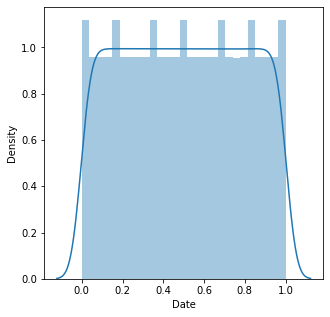

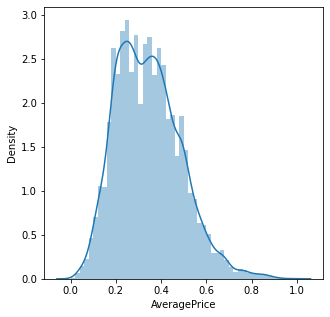

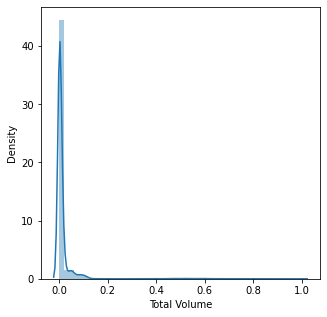

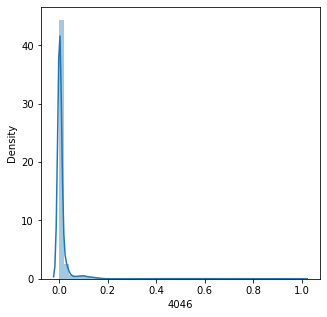

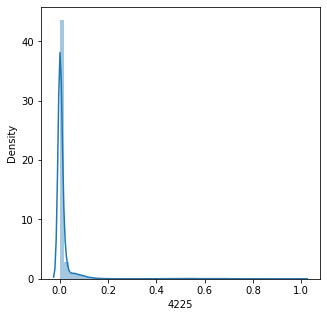

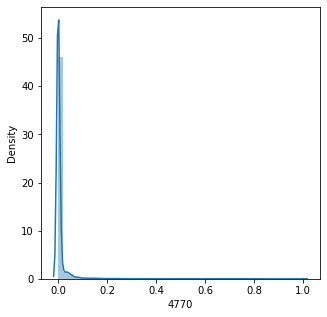

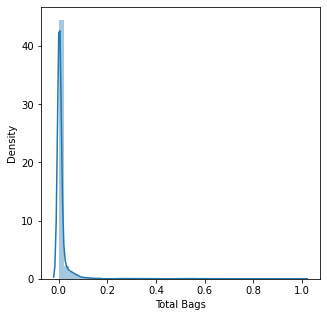

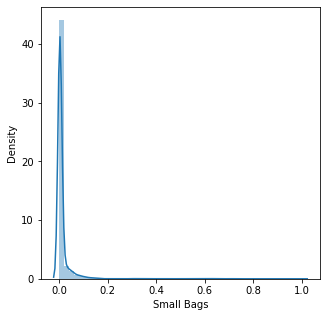

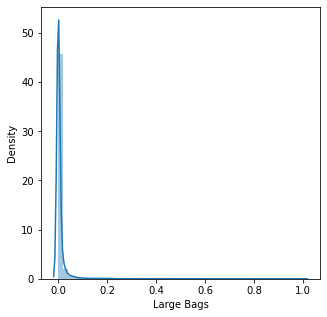

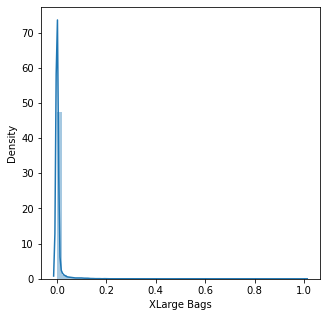

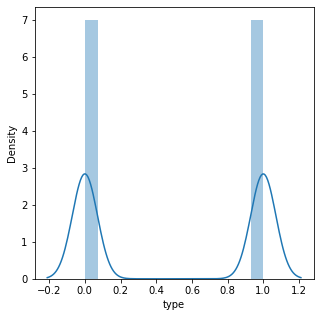

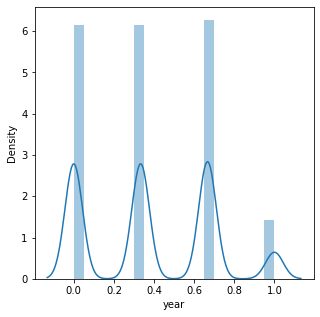

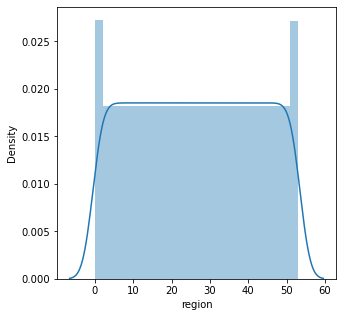

In [175]:
for column in df:
        plt.figure(figsize=(5,5))
        sn.distplot(df[column])

Some Skewness is present in various columns which we will handle later.

### Boxplot

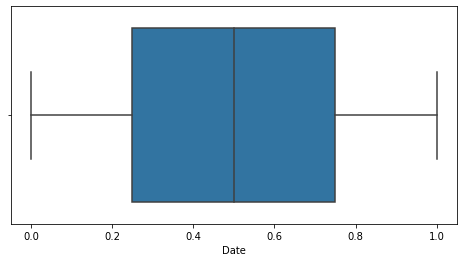

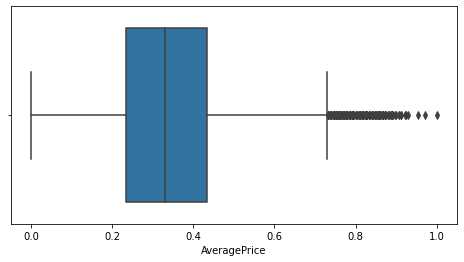

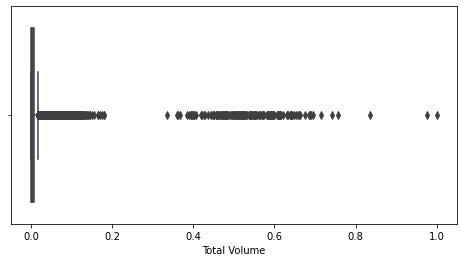

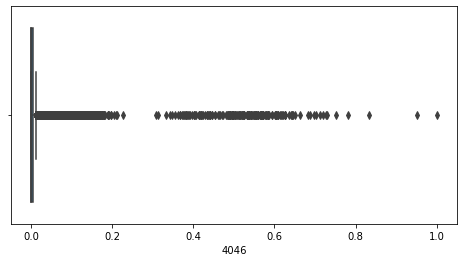

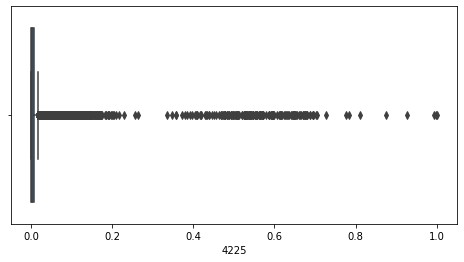

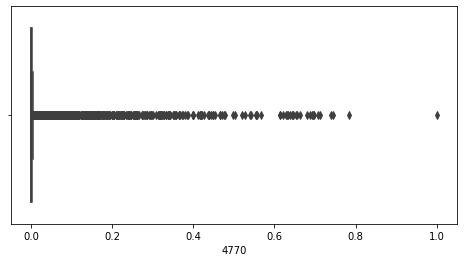

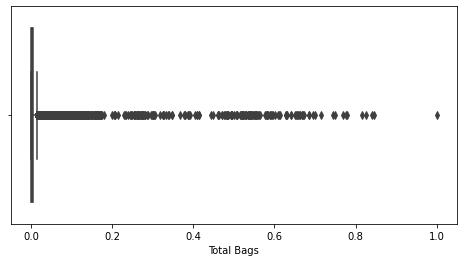

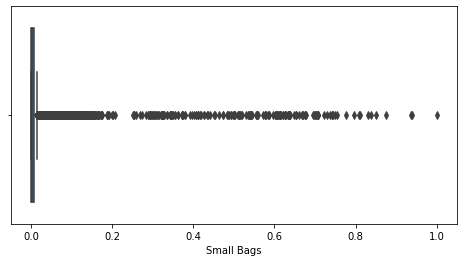

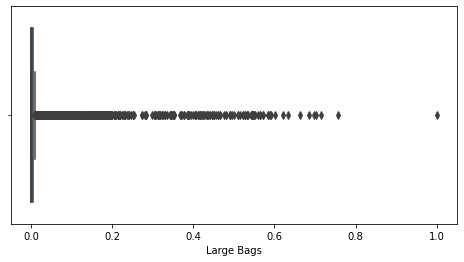

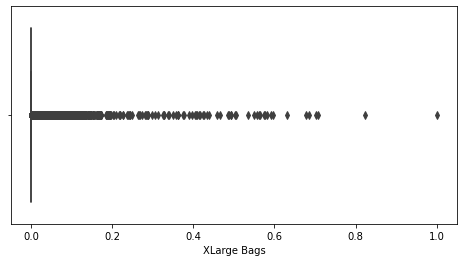

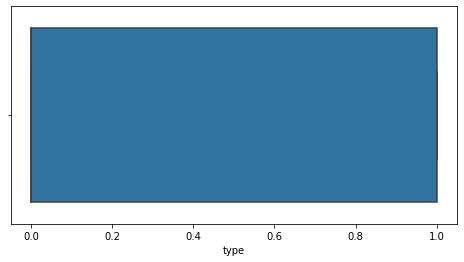

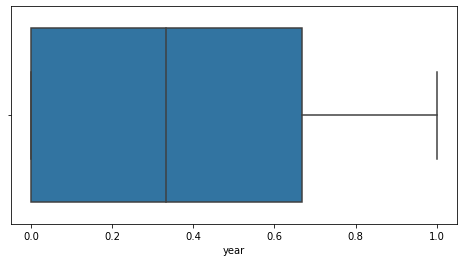

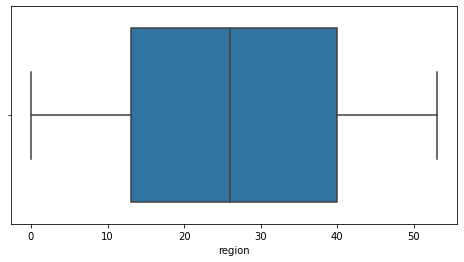

In [176]:
for column in df:
        plt.figure(figsize=(8,4))
        sn.boxplot(x=column,data=df)

Some columns have a high amount of outliers in them

### Pairplot

#### REGION

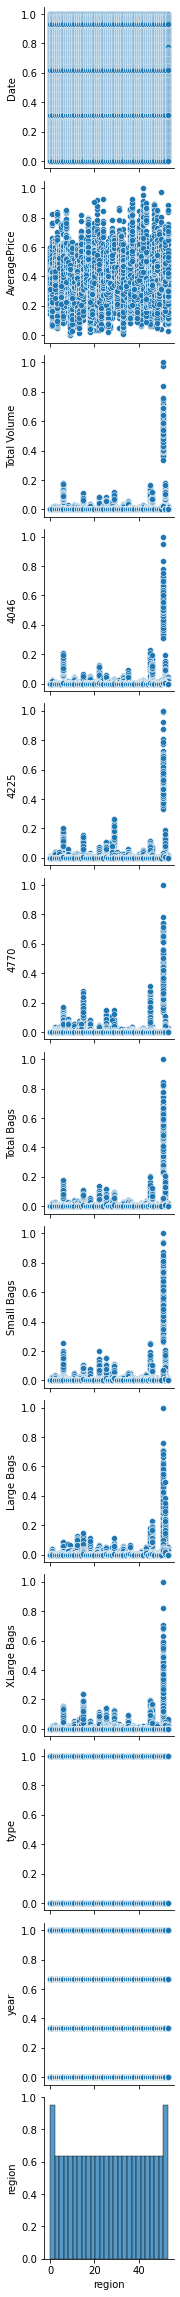

In [177]:
sn.pairplot(data=df,
            x_vars=['region'],
            y_vars=df.columns)

### Heatmap

<AxesSubplot:>

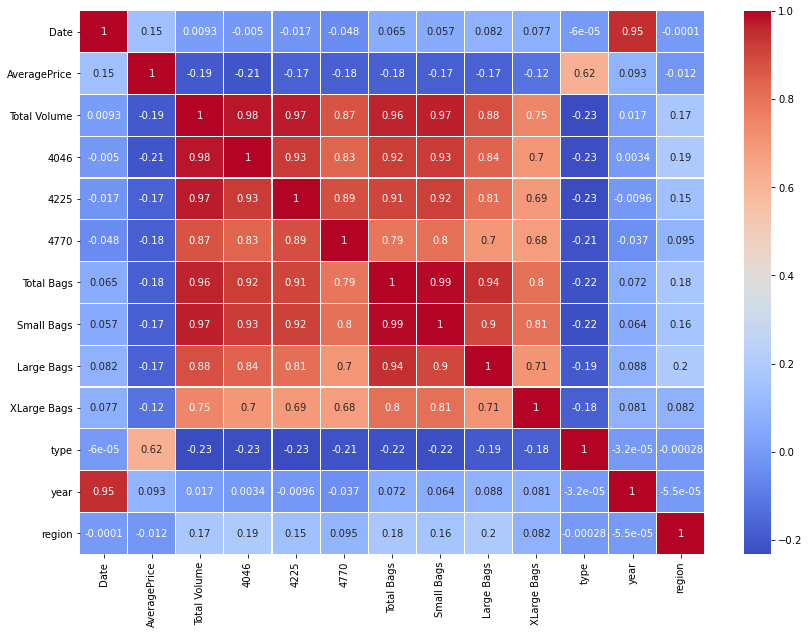

In [178]:
plt.figure(figsize=(14,10))
sn.heatmap(df.corr(),linewidths=.1,cmap="coolwarm", annot=True)

### Countplot

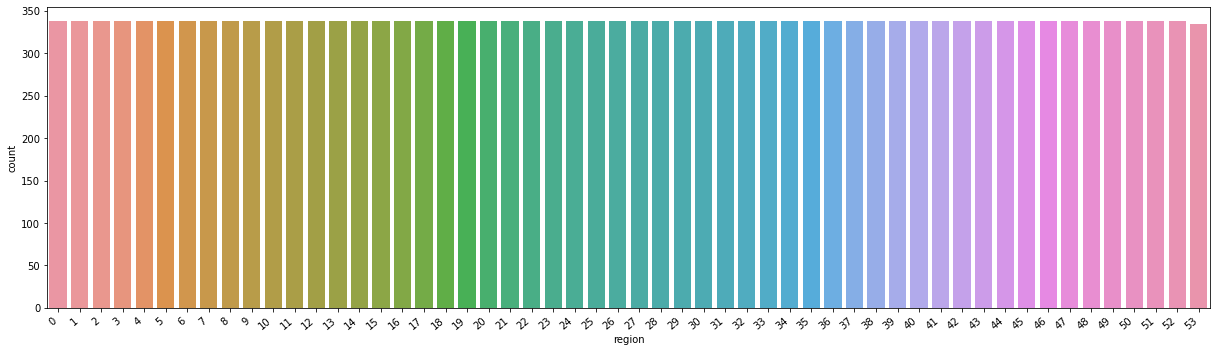

In [179]:
plt.figure(figsize=(17,5))
ax=sn.countplot(df["region"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Every class is balanced

# Removing Outliers

In [180]:
from scipy.stats import zscore

In [181]:
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]

In [182]:
df.shape

(17651, 13)

Only 3.27 percent data is lost so oltlier removal is successful.

# Skewness Removal

In [183]:
df.skew()

Date            0.013714
AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

### Total Volume

In [184]:
tv=np.sqrt(df["Total Volume"])
tv.skew()

1.9625263302597329

In [185]:
df["Total Volume"]=tv

### 4046

In [186]:
n1=np.sqrt(df["4046"])
n1.skew()

2.4975043264847994

In [187]:
df["4046"]=n1

### 4225

In [188]:
n2=np.sqrt(df["4225"])
n2.skew()

2.1285045840666115

In [189]:
df["4225"]=n2

### 4770

In [190]:
n3=np.sqrt(df["4770"])
n3.skew()

2.6366575660747875

In [191]:
df["4770"]=n3

### Total Bags

In [192]:
tb=np.sqrt(df["Total Bags"])
tb.skew()

2.010691337585347

In [193]:
df["Total Bags"]=tb

### Small Bags

In [194]:
sb=np.sqrt(df["Small Bags"])
sb.skew()

2.0937524665389446

In [195]:
df["Small Bags"]=sb

### Large Bags

In [196]:
lb=np.sqrt(df["Large Bags"])
lb.skew()

2.2367564369618895

In [197]:
df["Large Bags"]=lb

### XLarge Bags

In [198]:
xlb=np.sqrt(df["XLarge Bags"])
xlb.skew()

3.3124842464294346

In [199]:
xlb=np.sqrt(xlb)
xlb.skew()

1.7761239604590549

In [200]:
df["XLarge Bags"]=xlb

# For Region

## Input Splitting

In [201]:
x=df.drop(["region"],axis=1)

In [202]:
y=df["region"]

## Finding The Best Model

In [210]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [211]:
#classify function
from sklearn.model_selection import cross_val_score,train_test_split
def classify(model,x,y):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.50,random_state=343)
    #train the model
    model.fit(X_train,Y_train)
    ac=model.score(X_test,Y_test)*100
    print("Accuracy:",ac)
    
    #cross validation
    score=cross_val_score(model,x,y,cv=5)
    cv=np.mean(score)*100
    print("CV Score:",cv)
    
    #diffrence between them
    print("Diffrence:",abs(ac-cv))

In [212]:
DTC = DecisionTreeClassifier()
classify(DTC,x,y)

Accuracy: 77.12440516655337
CV Score: 56.127516460840965
Diffrence: 20.996888705712408


In [213]:
RC = RidgeClassifier()
classify(RC,x,y)

Accuracy: 17.550419215952868
CV Score: 15.007428338078837
Diffrence: 2.542990877874031


In [214]:
RFC = RandomForestClassifier()
classify(RFC,x,y)

Accuracy: 89.57625198277816
CV Score: 68.37034505388534
Diffrence: 21.205906928892816


In [215]:
KNN = KNeighborsClassifier()
classify(KNN,x,y)

Accuracy: 52.46997507364605
CV Score: 21.210129945773694
Diffrence: 31.259845127872353


In [216]:
ETC = ExtraTreesClassifier()
classify(ETC,x,y)

Accuracy: 90.75458871515976
CV Score: 69.3162286602757
Diffrence: 21.438360054884058


ExtraTreesClassifier is our Best Model

## Hyper parameter tuning

In [218]:
ETC.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [219]:
from sklearn.model_selection import GridSearchCV

In [237]:
params = {'n_estimators': [10,50,100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,8,16,32,50],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [1,2],
    'oob_score': [True, False],
    'max_features': ['auto','sqrt','log2'],    
    'bootstrap': [True, False],
    'warm_start': [True, False]}

In [238]:
gs = GridSearchCV(ETC, params, verbose = 1, cv=3, n_jobs = -1)

In [239]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.25,random_state=7)
gs.fit(X_train, Y_train)

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


GridSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 8, 16, 32, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100],
                         'oob_score': [True, False],
                         'warm_start': [True, False]},
             verbose=1)

In [240]:
gs.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 32,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'oob_score': False,
 'warm_start': False}

## Checking Accuracy Score

In [241]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [243]:
ETC=ExtraTreesClassifier(bootstrap= False,
 criterion= "gini",
 max_depth= 32,
 max_features= "log2",
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 100,
 oob_score= False,
 warm_start= False)

In [244]:
ETC.fit(X_train,Y_train)

ExtraTreesClassifier(max_depth=32, max_features='log2')

In [245]:
ETC.score(X_test,Y_test)

0.8721202507742276

In [247]:
y_test_pred=ETC.predict(X_test)

In [248]:
print(ETC.score(X_test, y_test_pred))

1.0


## Finally Saving our model

In [249]:
import joblib
joblib.dump(ETC,r"C:\Users\Avinash\Desktop\Projects\EvaluationProjects\3_Avacado\avocado_region.pkl")

['C:\\Users\\Avinash\\Desktop\\Projects\\EvaluationProjects\\3_Avacado\\avocado_region.pkl']

# Now For AveragePrice

## Input Splitting

In [252]:
x=df.drop(["AveragePrice"],axis=1)

In [253]:
y=df["AveragePrice"]

## Finding The Best Model

In [254]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [255]:
#regress function
from sklearn.model_selection import cross_val_score,train_test_split
def regress(model,x,y):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.25,random_state=7)
    #train the model
    model.fit(X_train,Y_train)
    ac=model.score(X_test,Y_test)*100
    print("R2:",ac)
    
    #cross validation
    score=cross_val_score(model,x,y,cv=5)
    cv=np.mean(score)*100
    print("CV Score:",cv)
    
    #diffrence between them
    print("Diffrence:",abs(ac-cv))

In [256]:
LR=LinearRegression()
regress(LR,x,y)

R2: 50.16378117939102
CV Score: 11.910685253415732
Diffrence: 38.25309592597529


In [257]:
DTR = DecisionTreeRegressor()
regress(DTR,x,y)

R2: 63.8802574130658
CV Score: -7.907513345230862
Diffrence: 71.78777075829666


In [258]:
RDG=Ridge()
regress(RDG,x,y)

R2: 48.08134274804294
CV Score: 9.393735348162135
Diffrence: 38.687607399880804


In [259]:
LSO=Lasso()
regress(LSO,x,y)

R2: -9.687573032657326e-06
CV Score: -115.66696748371699
Diffrence: 115.66695779614396


In [260]:
RFR=RandomForestRegressor()
regress(RFR,x,y)

R2: 82.75688049805672
CV Score: 45.056655473052324
Diffrence: 37.70022502500439


In [261]:
KNR=KNeighborsRegressor()
regress(KNR,x,y)

R2: 71.79830892820745
CV Score: 15.80509634069481
Diffrence: 55.99321258751264


In [262]:
XGB=XGBRegressor()
regress(XGB,x,y)

R2: 85.81483491694414
CV Score: 49.8323760788757
Diffrence: 35.98245883806844


XGBRegressor is our best model

## Hyper Parameter Tuning

In [264]:
XGB.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 12,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [281]:
params = {  'max_depth':[2,4,6],
    'min_child_weight': [1,2,3],
    'eta':[.1,.2,.3],
    'subsample': [1,2,3],
    'colsample_bytree': [1,2,3],
    'objective':['reg:linear','binary:logistic','multi:softmax']}

In [282]:
gs = GridSearchCV(XGB, params, verbose = 1, cv=3, n_jobs = -1)

In [283]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.25,random_state=7)
gs.fit(X_train, Y_train)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[20:37:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100...
                                    num_parallel_tree=1, predictor='auto',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_par

In [284]:
gs.best_params_

{'colsample_bytree': 1,
 'eta': 0.1,
 'max_depth': 6,
 'min_child_weight': 2,
 'objective': 'binary:logistic',
 'subsample': 1}

## Checking Accuracy Score

In [285]:
XGB=XGBRegressor(colsample_bytree= 1,
 eta= 0.1,
 max_depth= 6,
 min_child_weight= 2,
 objective= 'binary:logistic',
 subsample= 1)

In [286]:
XGB.fit(X_train,Y_train)

[20:40:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=6, min_child_weight=2, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, objective='binary:logistic', predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [287]:
XGB.score(X_test,Y_test)

0.8492599857355151

In [288]:
y_test_pred=XGB.predict(X_test)

In [289]:
print(XGB.score(X_test, y_test_pred))

1.0


## Finally Saving our model

In [290]:
import joblib
joblib.dump(ETC,r"C:\Users\Avinash\Desktop\Projects\EvaluationProjects\3_Avacado\avgprice_region.pkl")

['C:\\Users\\Avinash\\Desktop\\Projects\\EvaluationProjects\\3_Avacado\\avgprice_region.pkl']